Original Signal:


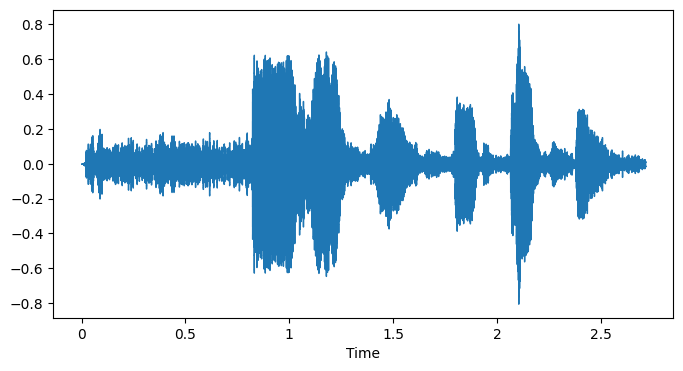

Trimmed Signal:


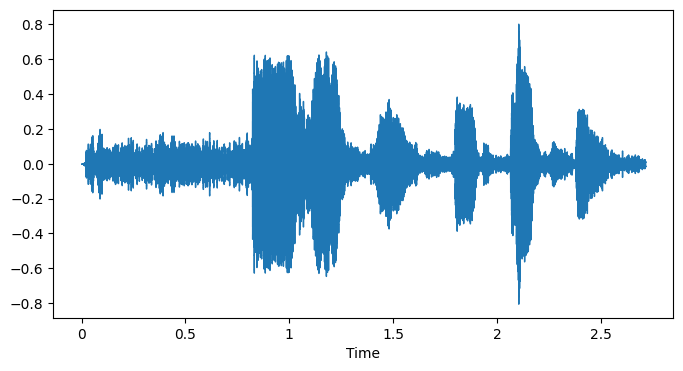

In [14]:
#BHEEMA SAIVARUN
#BL.EN.U4AIE21026
#A1
from IPython.display import Audio
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
y, sr = librosa.load('/content/SPEECH-PROCESSING.opus')

# Trim the silence from the beginning and end
y_trimmed, index = librosa.effects.trim(y)

# Display and play the original signal
print("Original Signal:")
plt.figure(figsize=(8, 4))
librosa.display.waveshow(y, sr=sr)
plt.show()

# Display and play the trimmed signal
print("Trimmed Signal:")
plt.figure(figsize=(8, 4))
librosa.display.waveshow(y_trimmed, sr=sr)
plt.show()

Original Signal:


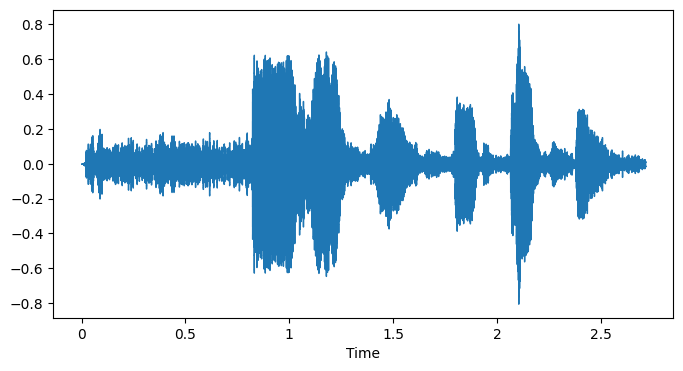

Split Signal (top_db=12):


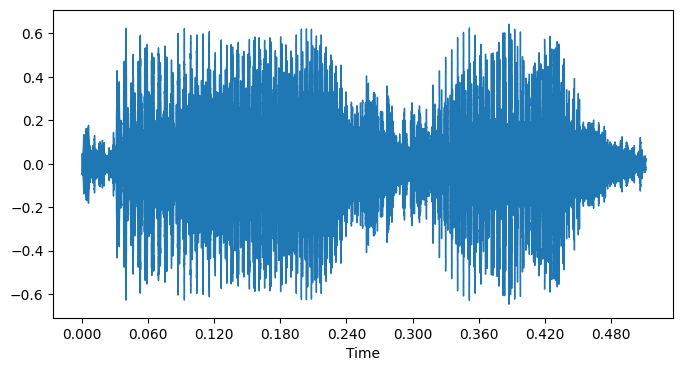

Split Signal (top_db=12):


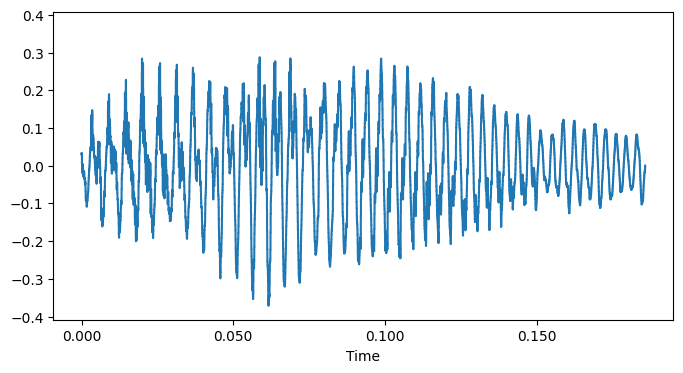

Split Signal (top_db=12):


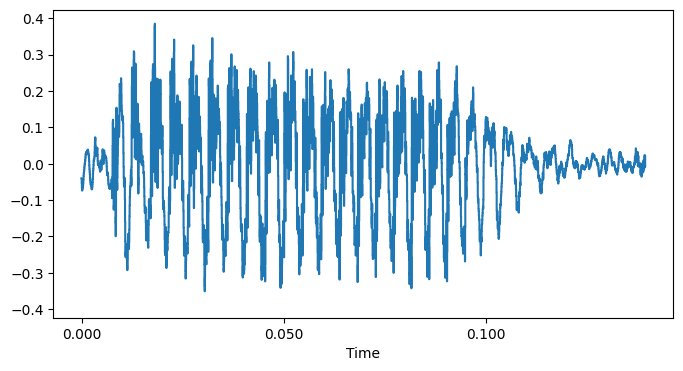

Split Signal (top_db=12):


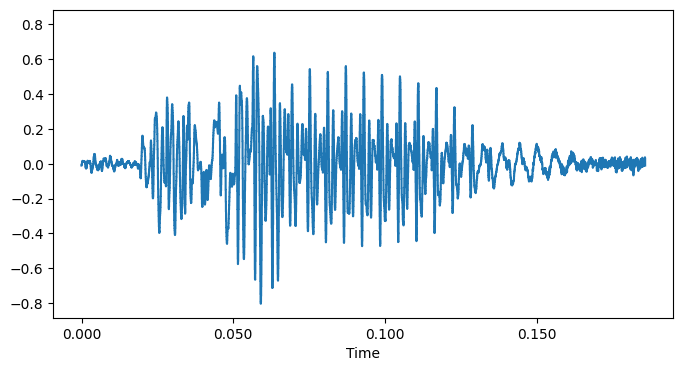

Split Signal (top_db=12):


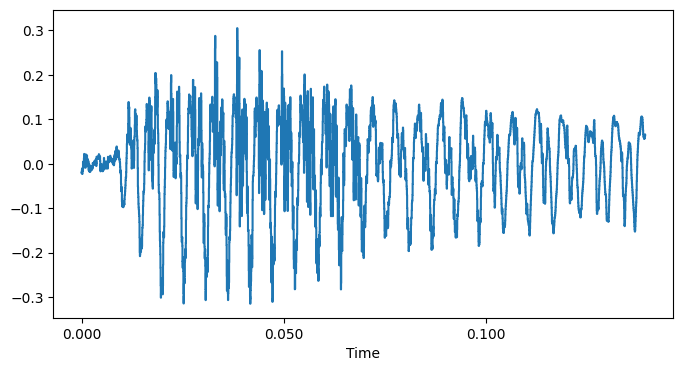

In [15]:

#A2
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

# Load the audio file
y, sr = librosa.load('/content/SPEECH-PROCESSING.opus')


# Set different top_db values for splitting
top_db_values = [12]

# Plot and play the original signal
print("Original Signal:")
plt.figure(figsize=(8, 4))
librosa.display.waveshow(y, sr=sr)
plt.show()

ipd.Audio(data=y, rate=sr)  # Play the original signal

# Apply librosa.effects.split() with different top_db values
for top_db in top_db_values:
    # Split the signal
    intervals = librosa.effects.split(y, top_db=top_db)

    # Plot and play each segment
    for interval in intervals:
        start, end = interval
        segment = y[start:end]

        print(f"Split Signal (top_db={top_db}):")
        plt.figure(figsize=(8, 4))
        librosa.display.waveshow(segment, sr=sr)
        plt.show()

        ipd.display(ipd.Audio(data=segment, rate=sr))



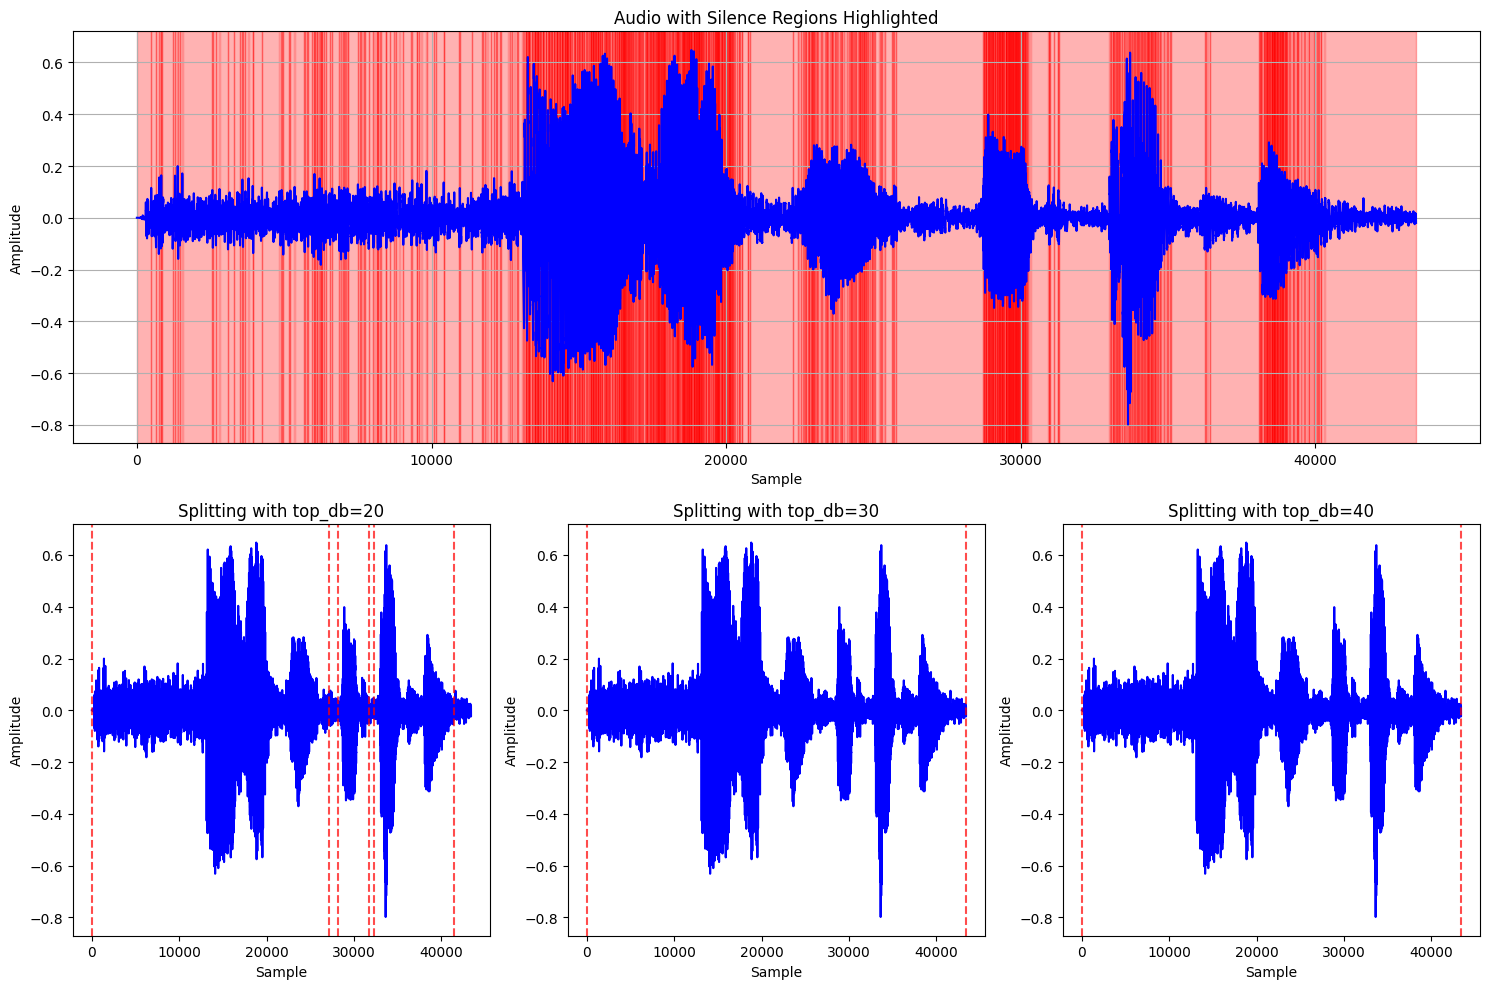

In [16]:
import numpy as np
# A3 .Define a function to calculate the energy of a given signal

def calculate_energy(signal):

    squared_signal = np.square(signal)  # Calculate the squared signal

    energy = np.sum(squared_signal)  # Calculate the total energy by summing the squared samples

    return energy

# Function to detect silence based on energy threshold

def detect_silence(signal, threshold):

    energy = calculate_energy(signal)

    if energy < threshold:  # If the energy is below the threshold, consider it as silence

        return True

    else:

        return False

# Load the audio file

file_path = "/content/SPEECH-PROCESSING.opus"

audio_signal, sample_rate = librosa.load(file_path, sr=None)

# Define an energy threshold for silence detection

energy_threshold = 0.01  # Adjust this threshold as needed

# Detect silence regions in the audio

silence_regions = []

current_region = []

for i, sample in enumerate(audio_signal):

    if detect_silence(sample, energy_threshold):

        current_region.append(i)

    elif current_region:

        silence_regions.append(current_region)

        current_region = []

if current_region:

    silence_regions.append(current_region)

# Perform splitting with different top_db values

top_db_values = [20, 30, 40]  # You can adjust these values as needed

# Plot the waveform with silence regions highlighted and split intervals overlaid

plt.figure(figsize=(15, 10))

# Plot the waveform with silence regions highlighted

plt.subplot(2, 1, 1)

plt.plot(audio_signal, color='b')

for region in silence_regions:

    plt.axvspan(region[0], region[-1], color='r', alpha=0.3)

plt.title("Audio with Silence Regions Highlighted")

plt.xlabel("Sample")

plt.ylabel("Amplitude")

plt.grid(True)

# Plot the waveform with split intervals overlaid

for i, top_db in enumerate(top_db_values):

    plt.subplot(2, len(top_db_values), len(top_db_values) + i + 1)

    split_audio_intervals = librosa.effects.split(audio_signal, top_db=top_db)

    plt.plot(audio_signal, color='b')

    for interval in split_audio_intervals:

        plt.axvline(interval[0], color='r', linestyle='--', alpha=0.7)

        plt.axvline(interval[1], color='r', linestyle='--', alpha=0.7)

    plt.title(f"Splitting with top_db={top_db}")

    plt.xlabel("Sample")

    plt.ylabel("Amplitude")

    plt.tight_layout()

plt.show()